# Image Classification (MobileNetV2, ImageNet)

> - 🤖 See [full list of Machine Learning Experiments](https://github.com/trekhleb/machine-learning-experiments) on GitHub
> - ▶️ Demo: [try this model in action](https://trekhleb.github.io/machine-learning-experiments)

## Importing dependencies

- [tensorflow](https://www.tensorflow.org/) - for developing and training ML models.
- [matplotlib](https://matplotlib.org/) - for plotting the data.
- [numpy](https://numpy.org/) - for linear algebra operations.
- [pathlib](https://docs.python.org/3/library/pathlib.html) - for working with model files.

In [181]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import platform
import pathlib

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.7.6
Tensorflow version: 2.1.0
Keras version: 2.2.4-tf


## Loading the model

MobileNet v2 models for Keras: https://www.tensorflow.org/api_docs/python/tf/keras/applications

In [168]:
model = tf.keras.applications.MobileNetV2()
print(model)

## Analyzing the model

In [170]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In order to plot the model the `graphviz` should be installed. For Mac OS it may be installed using `brew` like `brew install graphviz`.

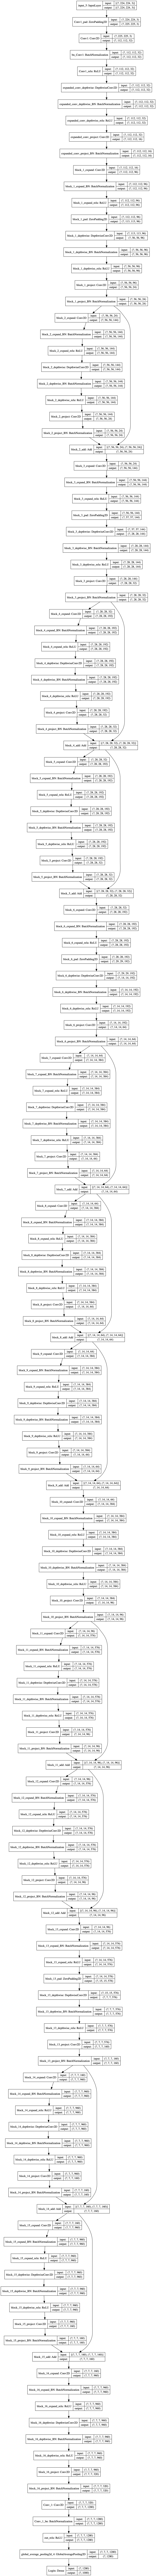

In [171]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [163]:
INPUT_IMAGE_SIZE = model.get_input_shape_at(0)[1]
print('INPUT_IMAGE_SIZE:', INPUT_IMAGE_SIZE)

INPUT_IMAGE_SIZE: 224


## Loading the labels

In [176]:
LABELS_URL = 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt', LABELS_URL)
labels = np.array(
    open(labels_path).read().splitlines()
)[1:]

In [177]:
print('Labels shape:', labels.shape)

Labels shape: (1000,)


In [178]:
print(labels)

['tench' 'goldfish' 'great white shark' 'tiger shark' 'hammerhead'
 'electric ray' 'stingray' 'cock' 'hen' 'ostrich' 'brambling' 'goldfinch'
 'house finch' 'junco' 'indigo bunting' 'robin' 'bulbul' 'jay' 'magpie'
 'chickadee' 'water ouzel' 'kite' 'bald eagle' 'vulture' 'great grey owl'
 'European fire salamander' 'common newt' 'eft' 'spotted salamander'
 'axolotl' 'bullfrog' 'tree frog' 'tailed frog' 'loggerhead'
 'leatherback turtle' 'mud turtle' 'terrapin' 'box turtle' 'banded gecko'
 'common iguana' 'American chameleon' 'whiptail' 'agama' 'frilled lizard'
 'alligator lizard' 'Gila monster' 'green lizard' 'African chameleon'
 'Komodo dragon' 'African crocodile' 'American alligator' 'triceratops'
 'thunder snake' 'ringneck snake' 'hognose snake' 'green snake'
 'king snake' 'garter snake' 'water snake' 'vine snake' 'night snake'
 'boa constrictor' 'rock python' 'Indian cobra' 'green mamba' 'sea snake'
 'horned viper' 'diamondback' 'sidewinder' 'trilobite' 'harvestman'
 'scorpion' 'blac

## Loading test images

In [179]:
def display_image(image_np):
    plt.figure()
    plt.imshow(image_np)

In [187]:
def load_image(image_path):
    # <PIL.Image.Image image mode=RGB size=224x224>
    return tf.keras.preprocessing.image.load_img(
        image_path,
        target_size=[INPUT_IMAGE_SIZE, INPUT_IMAGE_SIZE]
    )

In [199]:
def image_to_array(image):
    return tf.keras.preprocessing.image.img_to_array(image)

In [182]:
TEST_IMAGES_DIR_PATH = pathlib.Path('data')
TEST_IMAGE_PATHS = sorted(list(TEST_IMAGES_DIR_PATH.glob('*.jpg')))
TEST_IMAGE_PATHS

[PosixPath('data/banana.jpg'),
 PosixPath('data/city.jpg'),
 PosixPath('data/dogs.jpg'),
 PosixPath('data/ship.jpg'),
 PosixPath('data/street.jpg')]

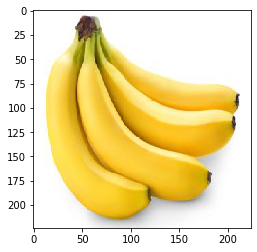

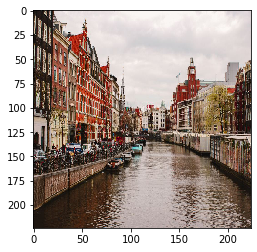

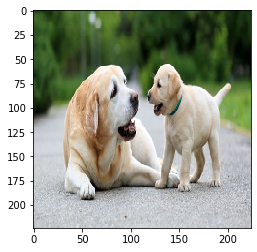

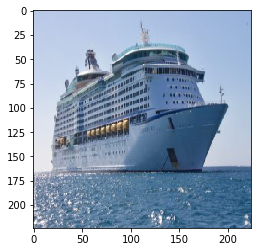

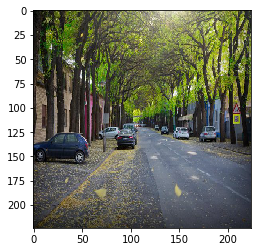

In [194]:
test_images = []
for image_path in TEST_IMAGE_PATHS:
    test_image = load_image(image_path)
    test_images.append(test_image)
    display_image(test_image)

In [200]:
test_input = image_to_array(test_images[0])

In [201]:
print('test_input.shape', test_input.shape)

test_input.shape (224, 224, 3)


In [114]:
test_input

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [115]:
test_input_preprocessed = tf.keras.applications.mobilenet_v2.preprocess_input(
    test_input[tf.newaxis, ...]
)

In [116]:
test_input_preprocessed.shape

(1, 224, 224, 3)

In [117]:
test_input_preprocessed

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]], dtype=float32)

In [118]:
result = model(test_input_preprocessed)

In [119]:
result.shape

TensorShape([1, 1000])

In [120]:
result

<tf.Tensor: shape=(1, 1000), dtype=float32, numpy=
array([[6.27256741e-05, 2.49076384e-05, 2.92051100e-05, 3.66856038e-05,
        1.41568653e-05, 4.05591127e-05, 2.07224839e-05, 5.90266136e-05,
        8.64975591e-05, 1.55985123e-04, 9.85823863e-05, 2.00868468e-04,
        3.62483479e-05, 2.38833218e-05, 5.74451042e-05, 5.17840599e-05,
        1.72888991e-04, 1.41889061e-04, 3.12768476e-04, 2.15080741e-04,
        4.07511507e-05, 3.32811265e-04, 1.21264653e-04, 2.12810453e-04,
        1.42057368e-04, 5.98373372e-05, 5.80516993e-04, 6.78443612e-05,
        8.38330307e-05, 7.96212480e-05, 4.06210092e-05, 9.22325198e-05,
        8.93434335e-05, 1.99521619e-05, 4.75170964e-05, 5.67715142e-05,
        8.95328703e-05, 9.73007191e-05, 7.21925462e-05, 9.88510728e-05,
        5.47226227e-05, 8.55796461e-05, 9.38306330e-05, 2.24222851e-04,
        3.10534320e-04, 7.11312823e-05, 6.25849570e-05, 7.02485559e-05,
        1.41088502e-04, 3.26961017e-05, 3.27529306e-05, 4.06065265e-05,
        2.996

In [121]:
sorted_result = np.argsort(result)

In [122]:
sorted_result.shape

(1, 1000)

In [123]:
sorted_reshaped_result = sorted_result[0,::-1]

In [124]:
sorted_reshaped_result.shape

(1000,)

In [125]:
sorted_reshaped_result

array([954, 942, 940, 939, 945, 941, 950, 858, 666, 506, 790, 779, 600,
       110, 673, 584, 616, 678, 502, 464, 185, 824, 784,  93, 936, 987,
       840, 951, 873, 457, 962, 953, 189, 990, 501, 701, 955, 932, 435,
       797, 979, 911,  26, 400, 186, 991, 838, 117, 680, 121, 972, 557,
       317, 414, 590, 537,  59, 248, 892,  68, 956, 767, 568, 885,  53,
       170, 220, 309, 524, 373, 241, 405, 679, 879, 720, 589, 944, 857,
       641, 299, 739, 219, 943, 677, 527, 656, 948, 842, 264,  83, 161,
        63, 355, 602, 998,  21, 929, 645, 601, 826, 861, 831, 823, 647,
        18,  44, 555, 613, 996, 959,  66, 899, 715, 493, 934,  52, 775,
       670, 507, 426, 473,  54, 291,  74, 672, 187, 296, 372, 486, 179,
       292, 671, 878, 214, 792, 345, 591, 636, 340, 891, 112, 573, 916,
       665, 144, 281, 251, 306, 468, 107, 463, 964, 146, 681, 260, 832,
       995,  56, 261, 912, 516, 876, 801, 608, 427, 151, 807, 682, 550,
       336, 119, 116, 937, 398, 256, 828,  96, 145, 240,  43, 77

In [126]:
max_classes = 5
decoded = imagenet_labels[sorted_reshaped_result + 1][:max_classes]

In [162]:
probability_threshold = 0.01
np_result = result.numpy()[0]

# s = np.argsort(result)
# s

# result_filtered = result > probability_threshold
# result[result_filtered]

# _, result_indices = np.where(result > probability_threshold)
# result_indices

# np_result_filtered = np_result > probability_threshold
# filtered_index_array = np.where(np_result_filtered)
# index_array = np.argsort(np_result)
# ff
# print('Filtered indices:', filtered_index_array)
# print('Sorted indices:', index_array[-5:])
# np.take_along_axis(r, index_array, axis=0)

np_result_mask = np_result > probability_threshold
np_result_filtered = np_result[np_result_mask]
imagenet_labels_filtered = imagenet_labels[1:][np_result_mask]
index_array = np.argsort(np_result_filtered)
imagenet_labels_filtered_sorted = imagenet_labels_filtered[index_array]


print('np_result_filtered:', np_result_filtered)
print('imagenet_labels_filtered:', imagenet_labels_filtered)
print('index_array:', index_array)
print('imagenet_labels_filtered_sorted:', imagenet_labels_filtered_sorted)

np_result_filtered: [0.01190142 0.02559635 0.03040617 0.7720705 ]
imagenet_labels_filtered: ['zucchini' 'spaghetti squash' 'butternut squash' 'banana']
index_array: [0 1 2 3]
imagenet_labels_filtered_sorted: ['zucchini' 'spaghetti squash' 'butternut squash' 'banana']


In [38]:
decoded.shape

(5,)

In [39]:
decoded

array(['banana', 'butternut squash', 'spaghetti squash', 'zucchini',
       'bell pepper'], dtype='<U30')

## Save the model

In [41]:
model_name = 'image_classification.h5'
model.save(model_name, save_format='h5')

## Converting the model to web-format

To use this model on the web we need to convert it into the format that will be understandable by [tensorflowjs](https://www.tensorflow.org/js). To do so we may use [tfjs-converter](https://github.com/tensorflow/tfjs/tree/master/tfjs-converter) as following:

```
tensorflowjs_converter --input_format keras \
  ./experiments/image_classification/image_classification.h5 \
  ./demos/public/models/image_classification
```